In [1]:
from google.colab import drive

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Elevvo Internship/Customer Segmentation/Mall_Customers.csv'
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
x = data[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

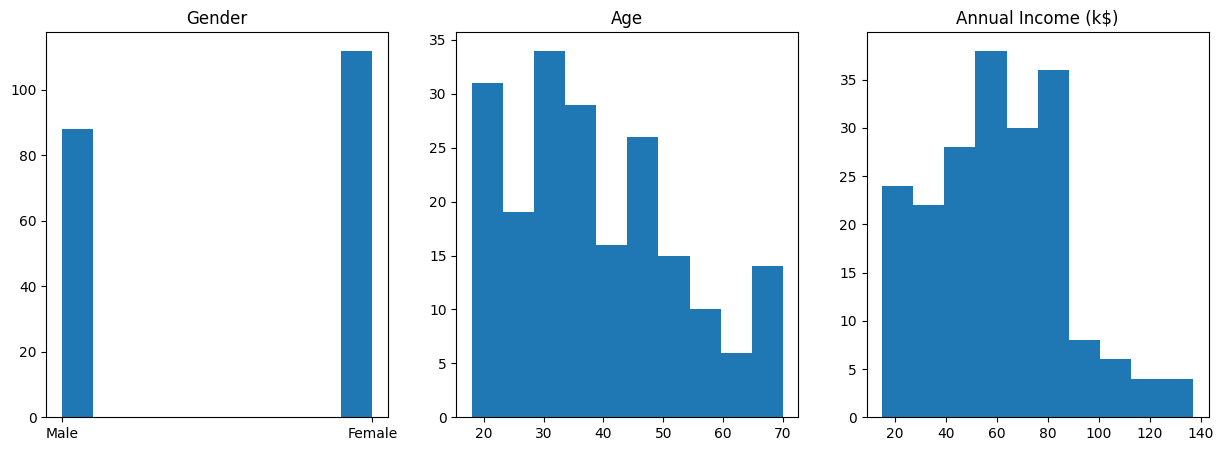

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(x.columns) - 1):
  axs[i].hist(x.iloc[:, i])
  axs[i].set_title(x.columns[i])

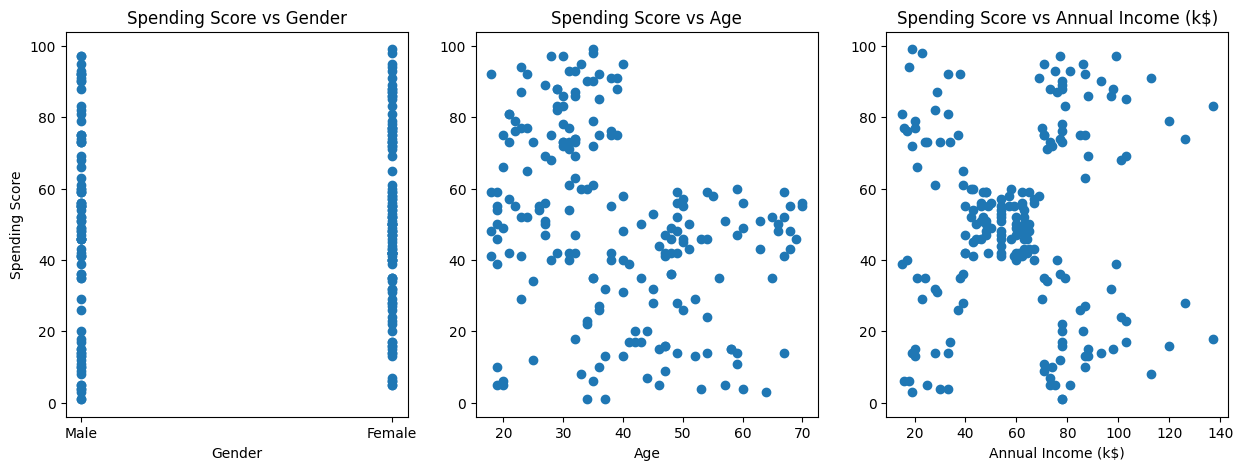

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(x.columns) - 1):
  axs[i].scatter(x.iloc[:, i], x["Spending Score (1-100)"])
  axs[i].set_title(f"Spending Score vs {x.columns[i]}")
  axs[i].set_xlabel(x.columns[i])
axs[0].set_ylabel("Spending Score");

In [6]:
x.replace({"Male": 0, "Female": 1}, inplace=True)

/tmp/ipython-input-3368670580.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.replace({"Male": 0, "Female": 1}, inplace=True)
/tmp/ipython-input-3368670580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.replace({"Male": 0, "Female": 1}, inplace=True)


In [7]:
kmeans_model = KMeans(n_clusters=5, random_state=42, verbose=1)

kmeans_model.fit(x);

Initialization complete
Iteration 0, inertia 134653.0.
Iteration 1, inertia 98473.36232460174.
Iteration 2, inertia 97317.60975014973.
Iteration 3, inertia 97260.4789301898.
Converged at iteration 3: strict convergence.


In [8]:
kmeans_labels = kmeans_model.labels_
kmeans_centroids = kmeans_model.cluster_centers_

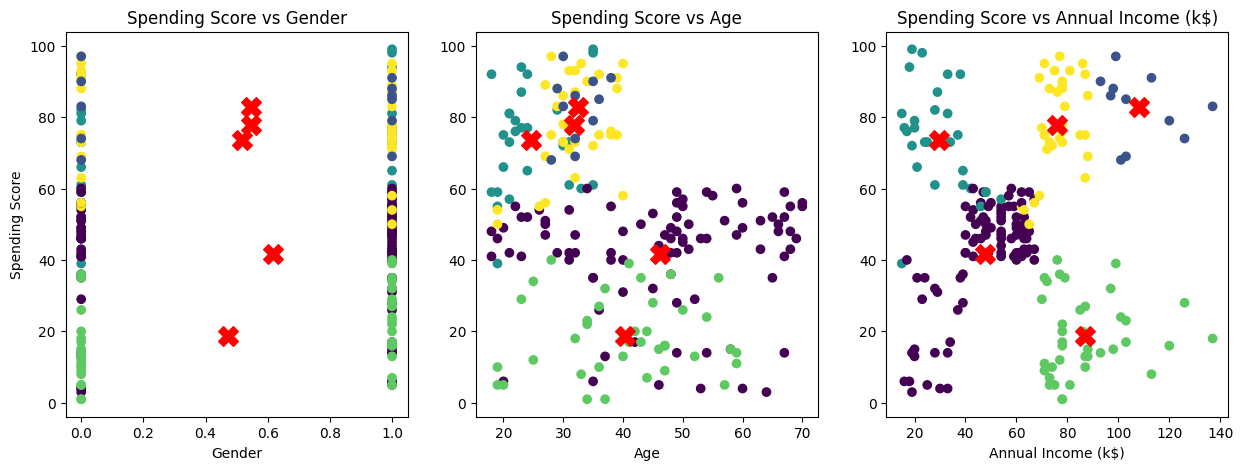

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(x.columns) - 1):
  axs[i].scatter(x.iloc[:, i], x["Spending Score (1-100)"], c=kmeans_labels),
  axs[i].scatter(kmeans_centroids[:,i], kmeans_centroids[:,-1], c='red', marker='X', s=200)

  axs[i].set_title(f"Spending Score vs {x.columns[i]}")
  axs[i].set_xlabel(x.columns[i])

axs[0].set_ylabel("Spending Score");

In [10]:
output = pd.concat([x, pd.Series(kmeans_labels, name="Class")], axis=1)

output.groupby('Class').mean()["Spending Score (1-100)"]

,Spending Score (1-100)
Class,
0,41.797753
1,82.727273
2,73.655172
3,18.631579
4,77.757576


In [11]:
dbscan_model = DBSCAN(eps=10, min_samples=5)

dbscan_model.fit(x);

In [12]:
dbscan_labels = dbscan_model.labels_

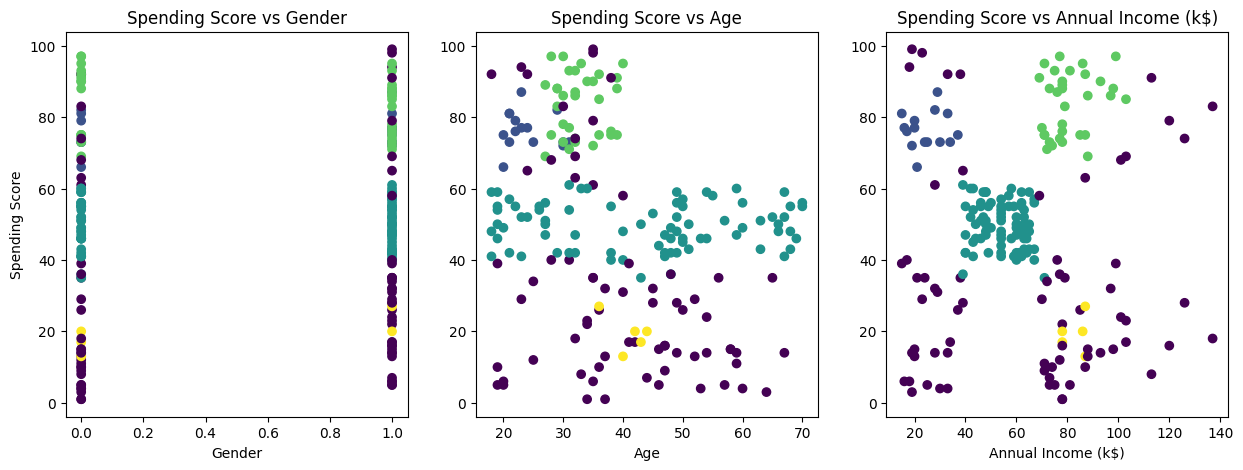

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(len(x.columns) - 1):
  axs[i].scatter(x.iloc[:, i], x["Spending Score (1-100)"], c=dbscan_labels),
  # axs[i].scatter(centroids[:,i], centroids[:,-1], c='red', marker='X', s=200)

  axs[i].set_title(f"Spending Score vs {x.columns[i]}")
  axs[i].set_xlabel(x.columns[i])

axs[0].set_ylabel("Spending Score");

In [14]:
output = pd.concat([x, pd.Series(dbscan_labels, name="Class")], axis=1)

output.groupby('Class').mean()["Spending Score (1-100)"]

,Spending Score (1-100)
Class,
-1,31.985507
0,76.333333
1,49.556962
2,83.625000
3,19.400000
